<a href="https://colab.research.google.com/github/PaulRel/PaulRel/blob/main/ML_Rault_Fourel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
* Describe the problem you need to solve
*   Explain whether your project can be treated as a classification or a regression or both.
*   Define the features and the target variable(s) you want to predict.
* Give the algorithms you need to use; it is important to use more than one type of algorithm/model.
* Explain the metrics by which you want to judge the effectiveness of your algorithms.
* Provide details of the validation phase.
---

# **Projet de Machine Learning**

Pour ce projet de Machine Learning, nous nous plongeons dans l'univers des appels t√©l√©phoniques marketing d'une institution bancaire portuguaise ayant pour but l'adh√©sions de noueaux clients. Nos diff√©rentes donn√©es divis√©es en 16 variables exposent les diff√©rentes caract√©ristiques des potentiels futurs clients qui ont √©t√© d√©march√©s ainsi que le r√©sultat de cette d√©marche √† savoir si oui ou non, ces clients ont accept√© de souscrire. L'objectif de la classification est de pr√©dire si le client souscrira un d√©p√¥t √† terme (variable y).

## Type de probl√®me
Ce projet rel√®ve du Machine Learning **supervis√©**, et plus pr√©cis√©ment d‚Äôun probl√®me de **classification binaire** car la variable cible y prend deux valeurs : "yes" (le client souscrit) et "no" (le client ne souscrit pas).

Il ne s'agit pas d‚Äôun probl√®me de r√©gression car il ne faut pas pr√©dire une valeur continue, mais une cat√©gorie.
D√©finition des variables (features et target)
Variable cible (target) :

## Description des variables

* **Variable cible :**

**y** : Indique si le client a souscrit ("yes") ou non ("no") √† un d√©p√¥t √† terme.
* **Variables explicatives :**

On peut regrouper les attributs en diff√©rentes cat√©gories :

**Caract√©ristiques du client** : √¢ge, emploi, situation matrimoniale, niveau d‚Äô√©ducation, d√©faut de cr√©dit, solde moyen annuel, pr√™ts en cours.

**D√©tails du dernier contact** : type de contact, jour et mois du contact, dur√©e de l‚Äôappel.

**Historique des campagnes** : nombre de contacts pr√©c√©dents, jours depuis le dernier contact, succ√®s ou √©chec des campagnes pass√©es.

**Remarque :**

* La variable **duration** (dur√©e de l‚Äôappel) est tr√®s corr√©l√©e avec la cible. Son inclusion peut biaiser le mod√®le car une conversation longue indique souvent une souscription. On pourrait faire deux versions du mod√®le, avec et sans cette variable.
* La variable **pdays** contient la valeur -1 pour signifier "jamais contact√© auparavant". Une transformation sera n√©cessaire (par exemple, cr√©er une variable binaire indiquant si le client a d√©j√† √©t√© contact√© ou non).

## Algorithmes √©tudi√©s

##  M√©triques d‚Äô√©valuation des mod√®les
Comme il s'agit d'un probl√®me de classification binaire, plusieurs m√©triques peuvent √™tre utilis√©es pour √©valuer la performance des mod√®les :

* **Accuracy**: % de pr√©dictions correctes (mais peut √™tre trompeur si les classes sont d√©s√©quilibr√©es).
* **Precision** : Proportion de vrais positifs parmi les pr√©dictions positives. Important si l‚Äôon veut minimiser les faux positifs.
* **Recall** : Proportion de vrais positifs parmi les cas r√©ellement positifs. Crucial si l‚Äôon veut minimiser les faux n√©gatifs (ne pas rater un client int√©ress√©).
* **F1-score** : Moyenne harmonique entre pr√©cision et rappel, utile pour un bon √©quilibre entre faux positifs et faux n√©gatifs.
* **AUC-ROC** (Area Under Curve - Receiver Operating Characteristic) : Mesure la capacit√© du mod√®le √† diff√©rencier les classes.

## Validation phase
La validation est essentielle pour garantir la g√©n√©ralisation du mod√®le. Voici les √©tapes √† suivre :

1. **Pr√©traitement des donn√©es**

* Encodage des variables cat√©goriques (One-Hot Encoding ou Label Encoding).
* Normalisation ou standardisation des variables num√©riques si n√©cessaire.
* Gestion des valeurs -1 dans pdays (cr√©ation d‚Äôune nouvelle variable).
* Division des donn√©es en train (80%) et test (20%).
2. **Cross-validation**
* Utilisation de la validation crois√©e en k-folds (k=5 ou k=10) pour √©viter le sur-apprentissage et √©valuer la stabilit√© du mod√®le.
3. **Optimisation des hyperparam√®tres**
* Utilisation de GridSearchCV ou RandomizedSearchCV pour trouver les meilleurs param√®tres pour chaque mod√®le.
4. **Test final et analyse des r√©sultats**
* Une fois le meilleur mod√®le s√©lectionn√©, on le teste sur l‚Äôensemble de test et on analyse ses performances via les m√©triques d√©finies pr√©c√©demment.
* On peut aussi tracer des courbes ROC et des matrices de confusion pour mieux visualiser les performances.

In [71]:
# Importation des biblioth√®ques n√©cessaires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [62]:
# Chargement des donn√©es
data = pd.read_csv('bank-full.csv', sep=';')
print("Colonnes : ", data.columns)

df = pd.read_csv("bank.csv", sep=";")

# Affichage des premi√®res lignes
print("\nVisualisation des 1eres lignes de l'√©chantillon bank.csv.")
print(df.head())

# Afficher les types de donn√©es
print(df.info())

Colonnes :  Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

Visualisation des 1eres lignes de l'√©chantillon bank.csv.
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330   

# Repartition de la variables cible

## Repartition de la variables cible dans bank.csv

<ipython-input-67-3285d4fccfc3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["y"], palette="pastel")


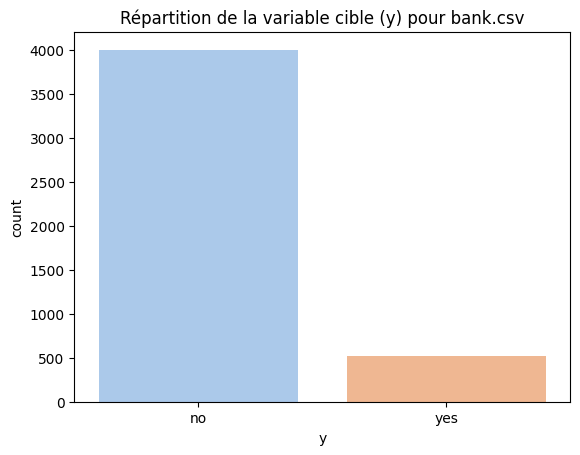

y
no     0.88476
yes    0.11524
Name: proportion, dtype: float64


In [67]:
# Compter le nombre d'observations pour chaque classe
sns.countplot(x=df["y"], palette="pastel")
plt.title("R√©partition de la variable cible (y) pour bank.csv")
plt.show()

# Afficher les proportions
print(df["y"].value_counts(normalize=True))


## Repartition de la variables cible dans bank-full.csv

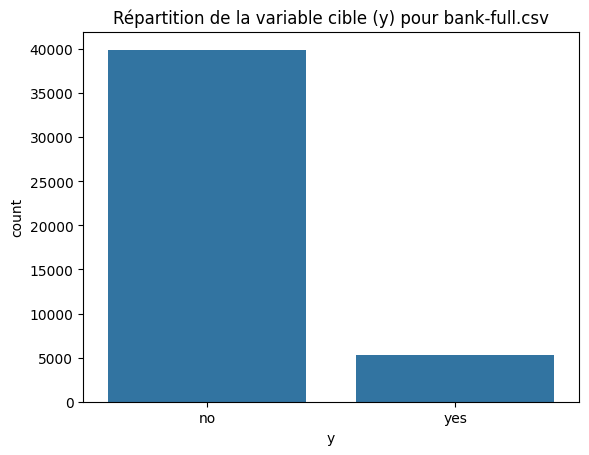

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64


In [76]:
# Compter le nombre d'observations pour chaque classe
sns.countplot(x=data["y"])
plt.title("R√©partition de la variable cible (y) pour bank-full.csv")
plt.show()

# Afficher les proportions
print(data["y"].value_counts(normalize=True))

# Visualisation des variables cat√©goriques

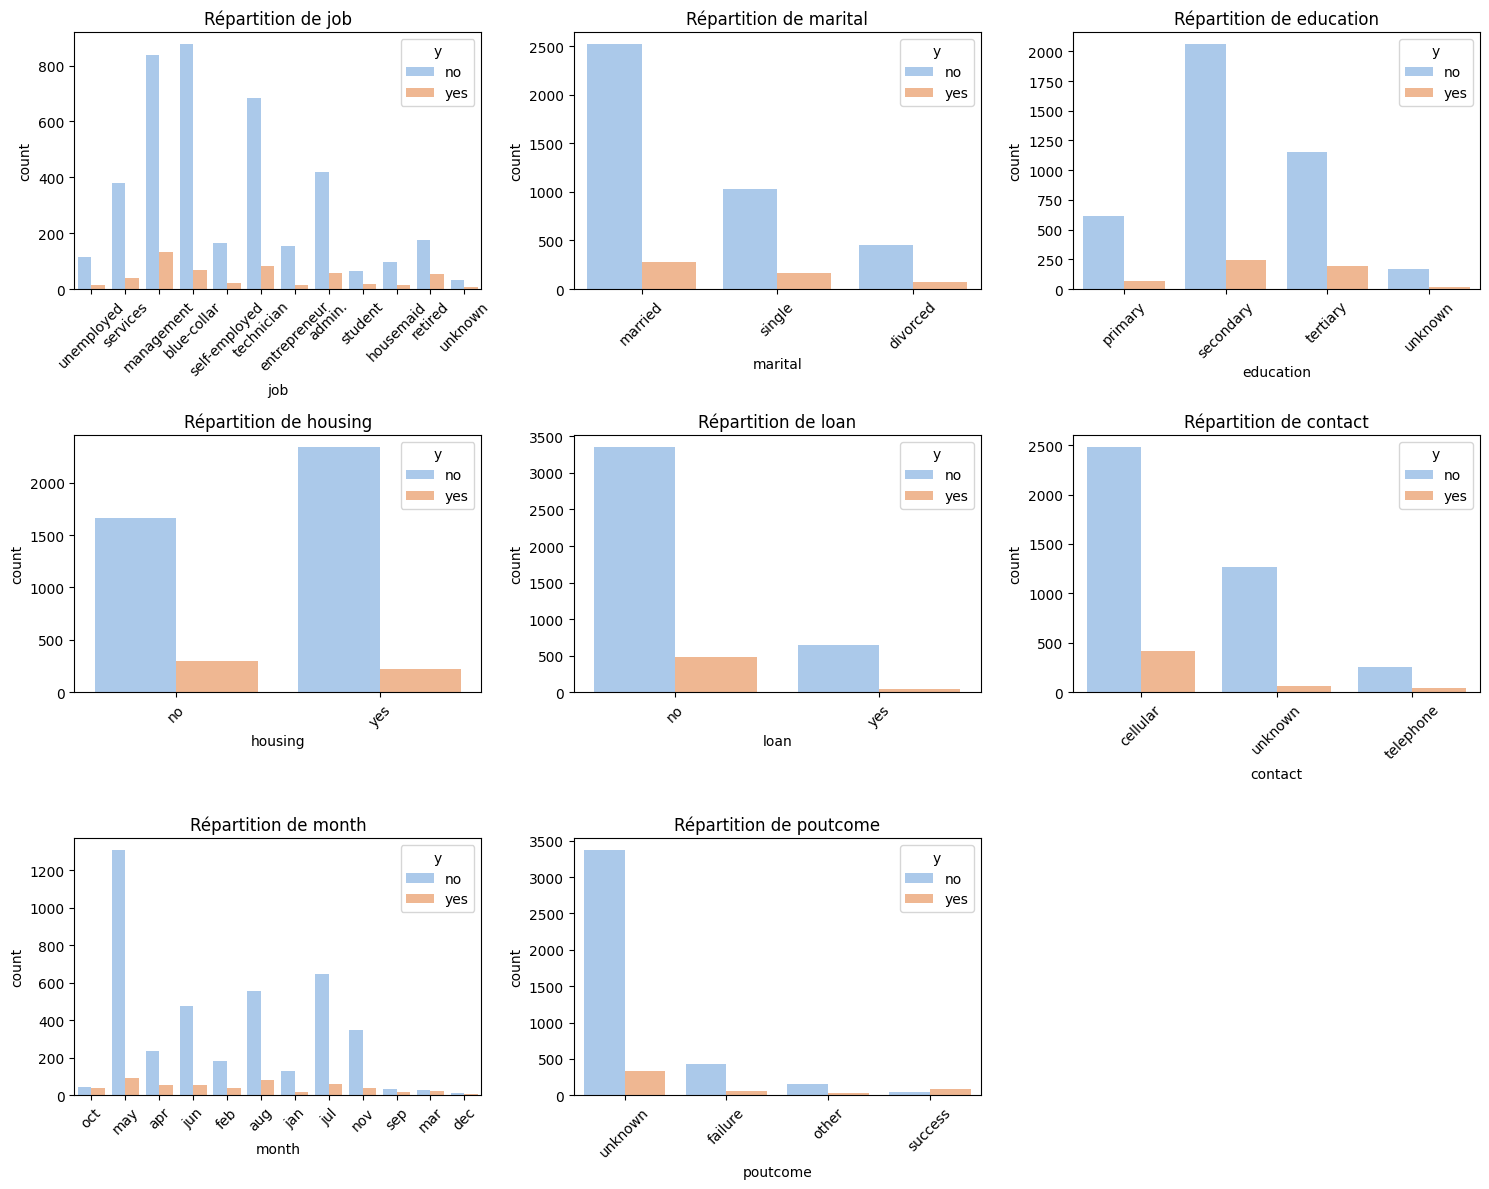

In [73]:
categorical_features = ["job", "marital", "education", "housing", "loan", "contact", "month", "poutcome"]

# Affichage des distributions
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=df[col], hue=df["y"], palette="pastel")
    plt.xticks(rotation=45)
    plt.title(f"R√©partition de {col}")
plt.tight_layout()
plt.show()


# Correlation

# Algorithme knn -- Justine

In [34]:

# D√©finir les caract√©ristiques (X) et la cible (y)
X = data.drop(columns='y')  # Enl√®ve la colonne cible 'y'
y = data['y']  # Colonne cible

# S√©parer les donn√©es en ensemble d'entra√Ænement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# D√©finir les pr√©traitements pour les colonnes num√©riques et cat√©gorielles
numeric_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day', 'poutcome']

# Transformer les variables num√©riques (normalisation) et les cat√©gorielles (One-Hot Encoding)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),  # Remplir les valeurs manquantes par la m√©diane
            ('scaler', StandardScaler())  # Normalisation des donn√©es num√©riques
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Remplir les valeurs manquantes par la valeur la plus fr√©quente
            ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding pour les variables cat√©gorielles
        ]), categorical_features)
    ])

# Liste des valeurs de k √† tester
k_values = range(1, 4000, 100)
accuracies = []

#Evaluer la performance
for k in k_values:
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier(n_neighbors=k))
    ])

    # Entra√Æner le mod√®le
    model.fit(X_train, y_train)

    # Pr√©dire sur l'ensemble de test
    y_pred = model.predict(X_test)

    # Calculer et stocker l'accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.2f}")
    accuracies.append(acc)

# V√©rifier que les dimensions sont correctes
print(f"Taille de k_values: {len(k_values)}")
print(f"Taille de accuracies: {len(accuracies)}")

# Tracer le graphique
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.xlabel("Nombre de voisins (k)")
plt.ylabel("Accuracy")
plt.title("√âvolution de l'accuracy en fonction de k")
plt.grid()
plt.show()


Accuracy: 0.88
Accuracy: 0.89
Accuracy: 0.89
Accuracy: 0.89
Accuracy: 0.89
Accuracy: 0.89
Accuracy: 0.88
Accuracy: 0.88
Accuracy: 0.88
Accuracy: 0.88
Accuracy: 0.88
Accuracy: 0.88
Accuracy: 0.88


KeyboardInterrupt: 

Dans l'algorithme knn :

1) Gestion des erreurs
- pour les attributs num√©riques, nous avons fait le choix de remplacer de potentiels valeurs manquantes par la moyenne des valeurs afin de ne pas avoir √† supprimer l'exemple entier ( et donc de potentielles informations apport√©es par leurs autres attributs ) ni la colonne car il s'agit de donn√©es importantes.
- pour les attributs categorical , nous avons fait le choix de remplacer de potentiels valeurs manquantes par la valeur revenant le plus souvent (la veleur majoritaire) pour les m√™mes raisons.

2) Choix du k

Pour d√©terminer quel k choisir, nous avons effectu√© diff√©rents tests avec diff√©rentes valeurs de k afin de choisir celui qui maximiserait l'accuracy. Ci dessus une courbe repr√©sentative de l'accuracy par rapport aux k choisis. En analysant ce graphique, nous avons d√©cid√© de choisir 40 pour valeur de k.

3) D√©savantages de cet algorithme

L'un des d√©savantages de cet algorithme est qu'il est extr√™mment long.

4) Avantages de cet algorithme

5) Choix du poids des ensembles entrainement/tests/validations
Pour la s√©paration des ensembles, nous avons d√©cid√© d'opter pour la m√©thode de validation al√©atoire

5) Pr√©dication finale

La pr√©diction finale qui nous est donn√© est

15=0.9
150=0.89

k=1, Accuracy: 0.88
k=11, Accuracy: 0.90
k=21, Accuracy: 0.90
k=31, Accuracy: 0.90
k=41, Accuracy: 0.90
k=51, Accuracy: 0.90
k=61, Accuracy: 0.90
k=71, Accuracy: 0.90
k=81, Accuracy: 0.90
k=91, Accuracy: 0.90

üéØ Meilleur k: 21 avec une accuracy de 0.90

üì¢ Pr√©dictions finales sur l'ensemble de test :
['no' 'no' 'no' ... 'no' 'no' 'no']


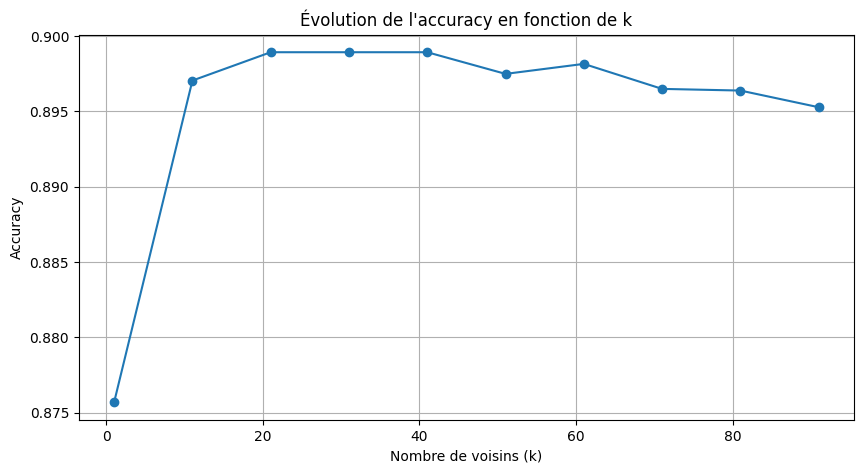

In [37]:
# üìå Chargement des donn√©es
data = pd.read_csv('/content/bank-full.csv', sep=';')

# D√©finir les caract√©ristiques (X) et la cible (y)
X = data.drop(columns='y')
y = data['y']

# S√©parer les donn√©es en ensemble d'entra√Ænement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# üìå D√©finition du pr√©processeur (one time only)
numeric_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day', 'poutcome']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# üìå Transformer une seule fois les donn√©es
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# üìå Liste des valeurs de k √† tester
k_values = range(1, 100, 10)
accuracies = []

# üìå Boucle pour tester diff√©rents k
best_k = None
best_accuracy = 0

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model.fit(X_train_transformed, y_train)

    # Pr√©diction
    y_pred = model.predict(X_test_transformed)

    # Calcul de l'accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"k={k}, Accuracy: {acc:.2f}")
    accuracies.append(acc)

    # üìå V√©rifier si c'est le meilleur mod√®le
    if acc > best_accuracy:
        best_accuracy = acc
        best_k = k

# üìå Affichage du meilleur k
print(f"\nüéØ Meilleur k: {best_k} avec une accuracy de {best_accuracy:.2f}")

# üìå Entra√Æner KNN avec le meilleur k et faire la pr√©diction finale
final_model = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
final_model.fit(X_train_transformed, y_train)

# üìå Pr√©diction finale sur X_test
final_predictions = final_model.predict(X_test_transformed)
print("\nüì¢ Pr√©dictions finales sur l'ensemble de test :")
print(final_predictions)

# üìå Graphique accuracy vs k
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.xlabel("Nombre de voisins (k)")
plt.ylabel("Accuracy")
plt.title("√âvolution de l'accuracy en fonction de k")
plt.grid()
plt.show()

# Algorithme naives Bayes -- Pauline

In [38]:
# Importation des biblioth√®que
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


üîç √âvaluation du mod√®le Naive Bayes :

Accuracy Score : 0.8265193370165745

Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       807
           1       0.30      0.45      0.36        98

    accuracy                           0.83       905
   macro avg       0.61      0.66      0.63       905
weighted avg       0.86      0.83      0.84       905



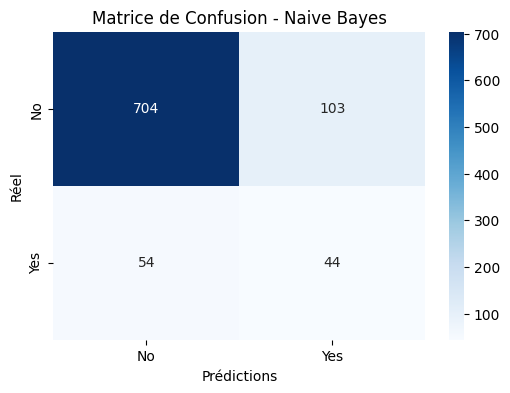

In [39]:
# Encodage des variables cat√©goriques car Naive Bayes ne fonctionne qu'avec des nombres
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    if col != 'y':  # Ne pas encoder la variable cible pour l'instant
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le  # Sauvegarder l'encodeur pour l'inverse plus tard

# Encodage de la variable cible ('y' : 'yes' = 1, 'no' = 0)
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# S√©paration des variables explicatives (X) et de la cible (y)
X = df.drop(columns=['y'])
y = df['y']

# Normalisation des variables num√©riques (utile pour Naive Bayes)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# S√©paration en donn√©es d'entra√Ænement et de test (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Cr√©ation et entra√Ænement du mod√®le Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Pr√©dictions sur l'ensemble de test
y_pred = model.predict(X_test)

# √âvaluation du mod√®le
print("\nüîç √âvaluation du mod√®le Naive Bayes :\n")
print("Accuracy Score :", accuracy_score(y_test, y_pred))
print("\nClassification Report :\n", classification_report(y_test, y_pred))

# Matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Pr√©dictions")
plt.ylabel("R√©el")
plt.title("Matrice de Confusion - Naive Bayes")
plt.show()

## Analyse des r√©sultats pour Naive Bayes

1. **Score de pr√©cision (Accuracy)**

Accuracy = 82.65%

‚û°Ô∏è Cela signifie que le mod√®le pr√©dit correctement dans 82.65% des cas.

‚û°Ô∏è C'est un bon score global, mais attention, l'accuracy seule peut √™tre trompeuse si les classes sont d√©s√©quilibr√©es.

2. **Rapport de Classification**

Classe	Precision	Recall	F1-score

0 (No)	    0.93	 0.87	   0.90

1 (Yes)	    0.30	 0.45	   0.36

üîπ Classe "0" (client ne souscrit pas de d√©p√¥t) :

Tr√®s bien pr√©dite avec une pr√©cision de 93% et un rappel de 87%. Cela signifie que quand le mod√®le pr√©dit "No", il est g√©n√©ralement correct.

üîπ Classe "1" (client souscrit un d√©p√¥t) :

Pr√©cision faible (30%) ‚Üí Beaucoup de faux positifs.

Rappel moyen (45%) ‚Üí Il d√©tecte presque la moiti√© des clients qui acceptent le d√©p√¥t, mais en manque encore beaucoup.

F1-score faible (36%), ce qui indique une difficult√© √† bien mod√©liser cette classe.

üìå Interpr√©tation :

Le mod√®le est tr√®s bon pour pr√©dire les clients qui refusent (0). Il est mauvais pour pr√©dire ceux qui acceptent (1), ce qui signifie que les clients potentiels sont souvent mal class√©s.

3. **Matrice de Confusion**

‚û°Ô∏è Probl√®me principal :
* **Faux positifs √©lev√©s** (103) : Le mod√®le classe certains clients comme int√©ress√©s alors qu‚Äôils ne le sont pas.
* **Faux n√©gatifs √©lev√©s** (54) : Il manque plus de la moiti√© des clients qui auraient r√©ellement accept√© l‚Äôoffre.

4. **Cons√©quence pour la banque** :

Si la banque utilise ce mod√®le pour pr√©dire quels clients appeler, elle risque d‚Äôappeler des personnes qui ne sont pas du tout int√©ress√©es (faux positifs), ce qui est un co√ªt inutile.
Pire, elle risque de manquer des clients r√©ellement int√©ress√©s (faux n√©gatifs), donc perdre des opportunit√©s commerciales.

5. **Pourquoi ces r√©sultats avec Naive Bayes ?**

* Le mod√®le Naive Bayes suppose que toutes les variables sont ind√©pendantes, ce qui est rarement vrai en marketing.
* Certaines variables influencent fortement la d√©cision du client, par exemple duration (dur√©e de l'appel).
* Le dataset est d√©s√©quilibr√© : il y a plus de "No" que de "Yes", donc Naive Bayes est biais√© vers la classe majoritaire.


## Copie exercice tp Naive Bayes

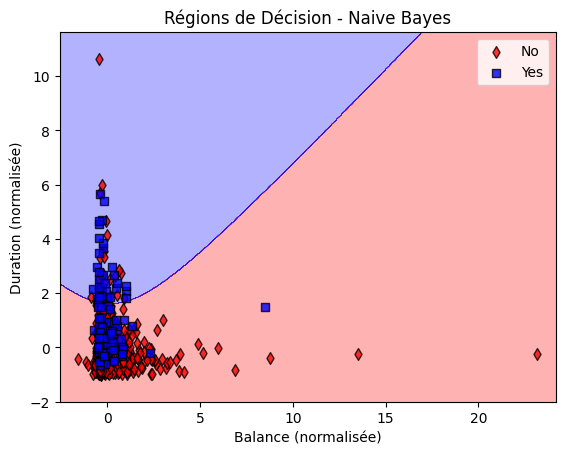

In [61]:
# Import des biblioth√®ques
from matplotlib.colors import ListedColormap

# Chargement des donn√©es
df = pd.read_csv("bank.csv", sep=";")

# Encodage des variables cat√©goriques
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    if col != 'y':  # Ne pas encoder la variable cible pour l'instant
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Encodage de la variable cible ('y' : 'yes' = 1, 'no' = 0)
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# S√©lection de 2 variables pour la visualisation
X = df[['balance', 'duration']].values  # Prend balance et duration pour le graphique
y = df['y'].values  # Variable cible

# Normalisation des donn√©es (important pour Naive Bayes)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# S√©paration en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entra√Ænement du mod√®le Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Fonction de visualisation des r√©gions de d√©cision
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('d', 's', 'o', '^', 'v')
    colors = ('red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

# Affichage du graphique
plot_decision_regions(X_test, y_test, gnb)
plt.xlabel("Balance (normalis√©e)")
plt.ylabel("Duration (normalis√©e)")
plt.title("R√©gions de D√©cision - Naive Bayes")
plt.legend(["No", "Yes"])
plt.show()


Algorithme arbre -- Justine

# Algorithme Perceptron -- Pauline

In [40]:
from sklearn.linear_model import Perceptron


üîç √âvaluation du mod√®le Perceptron :

Accuracy Score : 0.8121546961325967

Classification Report :
               precision    recall  f1-score   support

           0       0.92      0.87      0.89       807
           1       0.25      0.36      0.29        98

    accuracy                           0.81       905
   macro avg       0.58      0.61      0.59       905
weighted avg       0.84      0.81      0.83       905



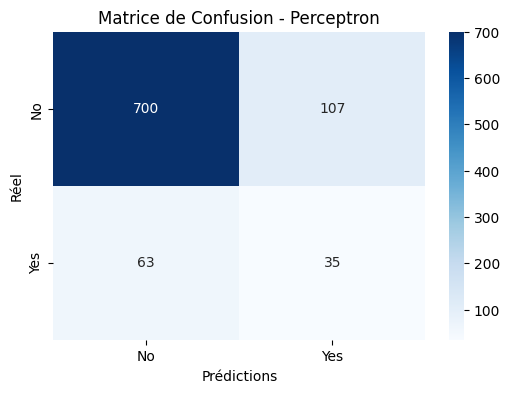

In [41]:
# Charger les donn√©es
df = pd.read_csv("bank.csv", sep=";")

# Encodage des variables cat√©goriques
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    if col != 'y':  # Ne pas encoder la variable cible pour l'instant
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Encodage de la variable cible ('y' : 'yes' = 1, 'no' = 0)
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# S√©paration des variables explicatives (X) et de la cible (y)
X = df.drop(columns=['y'])
y = df['y']

# Normalisation des donn√©es (obligatoire pour Perceptron)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# S√©paration en donn√©es d'entra√Ænement et de test (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Cr√©ation et entra√Ænement du mod√®le Perceptron
model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
model.fit(X_train, y_train)

# Pr√©dictions sur l'ensemble de test
y_pred = model.predict(X_test)

# √âvaluation du mod√®le
print("\nüîç √âvaluation du mod√®le Perceptron :\n")
print("Accuracy Score :", accuracy_score(y_test, y_pred))
print("\nClassification Report :\n", classification_report(y_test, y_pred))

# Matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Pr√©dictions")
plt.ylabel("R√©el")
plt.title("Matrice de Confusion - Perceptron")
plt.show()

1. **Score de pr√©cision globale (Accuracy)**

üìà Accuracy = 81.2%

‚û°Ô∏è C'est un bon score global, mais attention : comme les classes sont d√©s√©quilibr√©es, ce chiffre peut √™tre trompeur.

‚û°Ô∏è La performance r√©elle d√©pend surtout de la capacit√© √† bien pr√©dire la classe minoritaire (y=1).

2. **Rapport de Classification**

Classe	Pr√©cision (Precision)	Rappel (Recall)	F1-score

0 (No)	0.92	0.87	0.89

1 (Yes)	0.25	0.36	0.29

üìå Interpr√©tation :

üîπ La classe 0 (No) est bien pr√©dite avec un rappel de 87% et une pr√©cision de 92%.

üî∏ La classe 1 (Yes) est tr√®s mal d√©tect√©e :
Pr√©cision = 25% ‚Üí Quand le mod√®le dit "Yes", il se trompe 3 fois sur 4.

Rappel = 36% ‚Üí Il n‚Äôidentifie que 36% des clients qui acceptent vraiment l'offre.

F1-score = 29%, ce qui est tr√®s faible.

‚ùå Le mod√®le a du mal √† apprendre la classe minoritaire y=1 et pr√©f√®re pr√©dire "No" dans la majorit√© des cas.

3. **Matrice de Confusion**

* 63 faux n√©gatifs (r√©el Yes, pr√©dit No)

‚Üí ‚ùå 67% des clients int√©ress√©s sont ignor√©s.

‚Üí La banque perd des opportunit√©s en ne ciblant pas ces clients.

* 107 faux positifs (r√©el No, pr√©dit Yes)

‚Üí ‚ùå Le mod√®le fait beaucoup d‚Äôerreurs en pr√©disant "Yes" √† tort.

‚Üí Cela signifie que la banque contactera des clients non int√©ress√©s, ce qui est un co√ªt inutile.

4. **Pourquoi ces r√©sultats ?**

üî∏ Le Perceptron est un mod√®le lin√©aire. Il ne peut s√©parer correctement les classes si elles ne sont pas lin√©airement s√©parables.

üî∏ D√©s√©quilibre des classes : trop peu de y=1, donc il est biais√© vers y=0.

üî∏ Variables influentes ? La dur√©e de l'appel (duration) est tr√®s d√©terminante. Un mod√®le simple comme le Perceptron ne capture pas bien ce type de relation complexe.

# Algorithme R√©seau Neurone -- Pauline

In [42]:
# Importation des biblioth√®ques
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from imblearn.over_sampling import SMOTE

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 15ms/step - accuracy: 0.6928 - loss: 0.6020 - val_accuracy: 0.8133 - val_loss: 0.4344
Epoch 2/50
200/200 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 5ms/step - accuracy: 0.8197 - loss: 0.4220 - val_accuracy: 0.8243 - val_loss: 0.4190
Epoch 3/50
200/200 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 6ms/step - accuracy: 0.8366 - loss: 0.3871 - val_accuracy: 0.8177 - val_loss: 0.4098
Epoch 4/50
200/200 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 4ms/step - accuracy: 0.8502 - loss: 0.3646 - val_accuracy: 0.8155 - val_loss: 0.4197
Epoch 5/50
200/200 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.8526 - loss: 0.3569 - val_accuracy: 0.8110 - val_loss: 0.4213
Epoch 6/50
200/200 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.8618 - loss: 0.3480 - val_accuracy: 0.8232 - val_loss: 0.3967
Ep

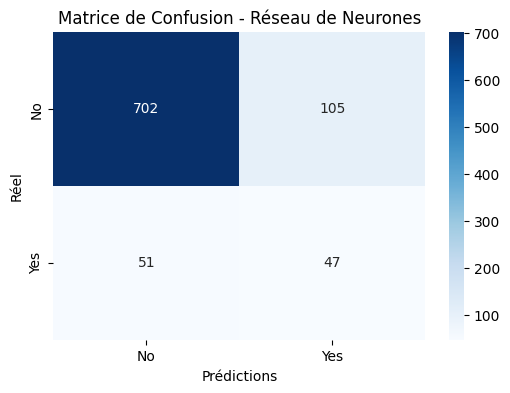

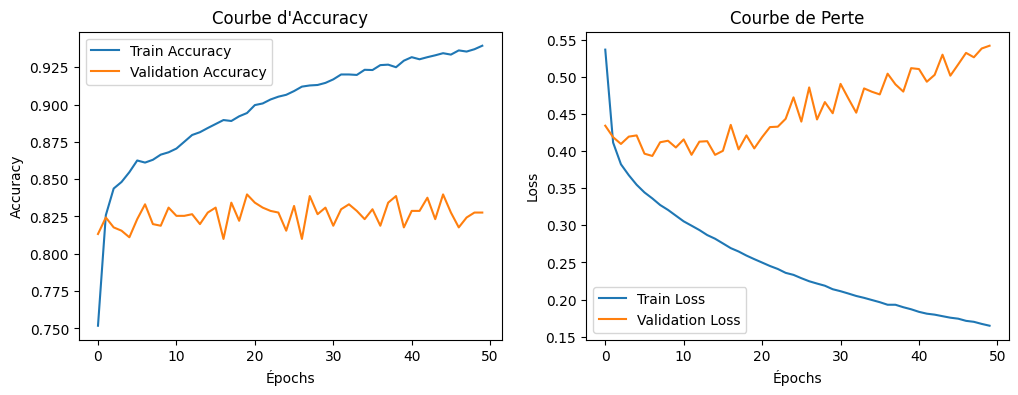

In [45]:
# Charger les donn√©es
df = pd.read_csv("bank.csv", sep=";")

# Encodage des variables cat√©goriques
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    if col != 'y':  # Ne pas encoder la variable cible pour l'instant
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Encodage de la variable cible ('y' : 'yes' = 1, 'no' = 0)
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Suppression des valeurs NaN (si pr√©sentes)
df = df.dropna()

# S√©paration des variables explicatives (X) et de la cible (y)
X = df.drop(columns=['y'])
y = df['y']

# Normalisation des donn√©es (important pour un r√©seau de neurones)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# S√©paration en donn√©es d'entra√Ænement et de test (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Optionnel : G√©rer le d√©s√©quilibre des classes avec SMOTE
#smote = SMOTE(random_state=42)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Cr√©ation du mod√®le de r√©seau de neurones
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Couche cach√©e 1
    Dense(16, activation='relu'),  # Couche cach√©e 2
    Dense(1, activation='sigmoid')  # Couche de sortie (classification binaire)
])

# Compilation du mod√®le
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entra√Ænement du mod√®le
history = model.fit(X_train_resampled, y_train_resampled, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Pr√©dictions sur l'ensemble de test
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# √âvaluation du mod√®le
print("\nüîç √âvaluation du mod√®le R√©seau de Neurones :\n")
print("Accuracy Score :", accuracy_score(y_test, y_pred))
print("\nClassification Report :\n", classification_report(y_test, y_pred))

# Matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Pr√©dictions")
plt.ylabel("R√©el")
plt.title("Matrice de Confusion - R√©seau de Neurones")
plt.show()

# Courbes d'entra√Ænement
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('√âpochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Courbe d'Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('√âpochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Courbe de Perte")

plt.show()


# Algorithme kmeans -- Justine

# Algorithme classification hi√©rarchique -- Justine